<a href="https://colab.research.google.com/github/pratik-chakraborty10/ML_Projects/blob/main/Handwritten_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [82]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [83]:
X,y=mnist['data'],mnist['target']

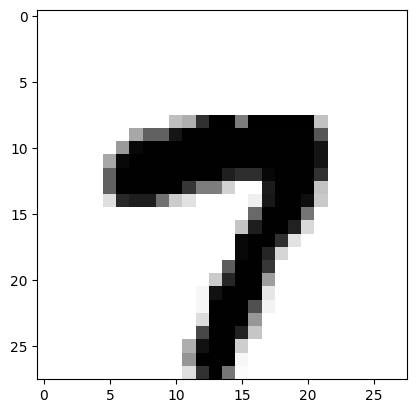

In [84]:
demo_digit = X.iloc[1871].values

demo_digit=demo_digit.reshape(28,28)
plt.imshow(demo_digit,cmap=matplotlib.cm.binary,interpolation='nearest')

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [86]:
cnn=tf.keras.models.Sequential()

In [87]:
cnn.add(tf.keras.layers.Dense(64,activation='relu',input_dim=784))
cnn.add(tf.keras.layers.Dense(64,activation='relu'))
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))


In [88]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
cnn.fit(X_train,tku.to_categorical(y_train),epochs=10,batch_size=32)

Epoch 1/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1332 - accuracy: 0.9623
Epoch 2/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1266 - accuracy: 0.9643
Epoch 3/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1195 - accuracy: 0.9660
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1151 - accuracy: 0.9666
Epoch 5/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1106 - accuracy: 0.9687
Epoch 6/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1043 - accuracy: 0.9708
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1034 - accuracy: 0.9712
Epoch 8/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.0996 - accuracy: 0.9722
Epoch 9/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0970 - accuracy: 0.9714
Epoch 10/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.094

In [99]:
cnn.evaluate(X_test,tku.to_categorical(y_test))

438/438 [==============================] - 1s 2ms/step - loss: 0.1988 - accuracy: 0.9545


[0.19882912933826447, 0.9545000195503235]

In [100]:
test_image=X.iloc[1871].values

In [101]:
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(result) #1.0000000e+00->100% accuracy of its being 7

1/1 [==============================] - 0s 27ms/step
[[1.4487087e-18 4.4715895e-18 6.7284214e-17 2.7360750e-20 2.6951149e-13
  1.0983219e-13 2.0997150e-31 1.0000000e+00 6.7102955e-33 2.6506051e-09]]
